<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


# Carga e inspección de datos

Análisis exploratorio de datos (Python)

Se tienen dos bases de datos:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

 Para estos dos datasets ahora necesitas

importar los archivos
estudiar los datos que contienen
asegurarte de que los tipos de datos sean correctos
identificar los 10 principales barrios en términos de finalización del recorrido
hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
sacar conclusiones basadas en cada gráfico y explicar los resultados
Paso 5. Prueba de hipótesis (Python)

/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

start_ts: fecha y hora de la recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
duration_seconds: duración del viaje en segundos
Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

In [ ]:
# Carga de las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, ttest_ind

In [ ]:
#Carga de datos, dataframe "trips" y "dropoff_location"
trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_location= pd.read_csv('/datasets/project_sql_result_04.csv')

In [ ]:
#Exploración de los datos
print(trips.head(5))
print()
trips.info()

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


OBSERVACIONES
- Se tiene en el data frame nombres de empresas de taxis con información del número de viajes de cada compañía de taxis del 15 y 16 de noviembre de 2017. Se tienen 64 entradas sin la presencia de datos nulos en sus dos columnas.
- Se considerea que los tipos de datos identificados por python son los adecuados según el contenido de las columnas donde para lo nombres de compañía ('company_name') se tiene un tipo de dato string y para el número de viajes registrados de cada compañía ('trips_amount') un tipo de dato integer.
- Nombres de columnas presenta un formato snake_case el cual es deseable de utilizar ya que mejora la legibilidad del código, separando las palabras con guiones bajos y en minúscula.

In [ ]:
print(dropoff_location.head())
print()
dropoff_location.info()

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


- Este data frame contiene 94 entradas de donde finalizaron los viajes, por la descripción brindada se sabe que son en barrios de Chicago ('dropoff_location_name') y el promedio de viajes que terminaron en cada barrio ('average_trips') en noviembre de 2017.
- Se considerea que los tipos de datos identificados por python son los adecuados según el contenido de las columnas donde para 'dropoff_location_name' es string y para 'average_trips' es float.
- De igual manera que el data frame anterior presenta un formato snake_case y no tiene valores nulos.

In [ ]:
#Revisión de valores duplicados en los data frames
print('DataFrame llamada "trips" tiene ', trips.duplicated().sum(), 'valores duplicados')
print()
print('DataFrame llamada "dropoff_location" tiene ', dropoff_location.duplicated().sum(), 'valores duplicados')

print()
#Revisando valores duplicados convirtiendo todo en minuscula
print(trips['company_name'].str.lower().value_counts()[trips['company_name'].str.lower().value_counts() > 1])
print(dropoff_location['dropoff_location_name'].str.lower().value_counts()[dropoff_location['dropoff_location_name'].str.lower().value_counts() > 1])


DataFrame llamada "trips" tiene  0 valores duplicados

DataFrame llamada "dropoff_location" tiene  0 valores duplicados

Series([], Name: company_name, dtype: int64)
Series([], Name: dropoff_location_name, dtype: int64)


## Empresas de taxis y número de viajes

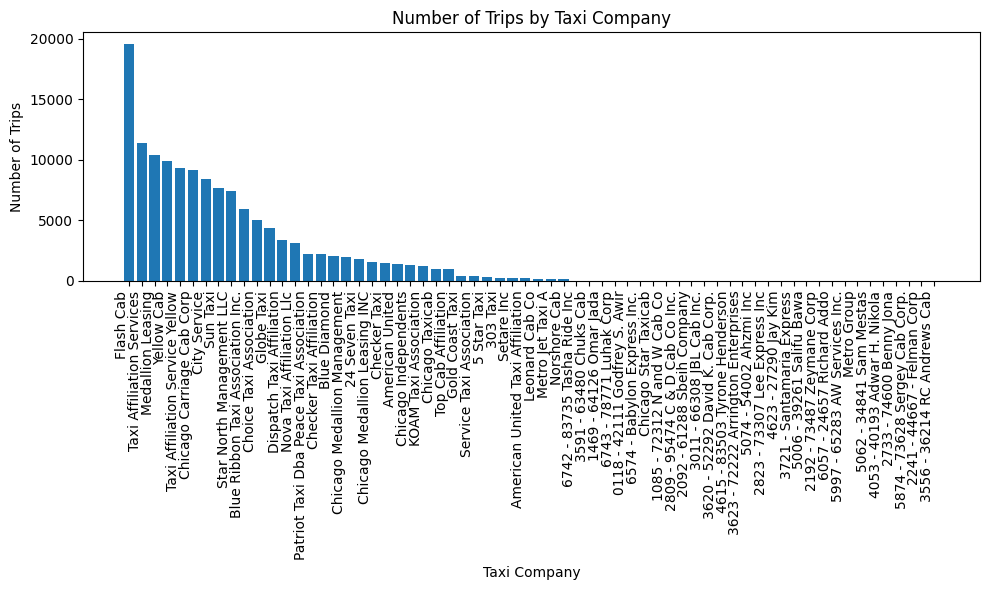

In [ ]:
#Gráfico de empresas de taxis
plt.figure(figsize=(10, 6))
plt.bar(trips['company_name'], trips['trips_amount'])
plt.xticks(rotation=90, ha='right')
plt.xlabel("Taxi Company")
plt.ylabel("Number of Trips")
plt.title("Number of Trips by Taxi Company")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de mostrar el resultado, se puede observar la compañía que tiene más viajes agendados.

Una recomendación que puedo hacer es limitar el número de elementos que se muestran, pro ejemplo, mostrar solo las primeras 15 empresas
</div>

- El gráfico muestra una distribución desigual del número total de viajes entre las distintas empresas de taxi. Solo unas pocas empresas concentran la mayor parte de los recorridos, mientras que la mayoría tienen volúmenes significativamente menores.
- Flash Cab es la empresa líder, con casi 20 000 viajes, muy por encima de todas las demás. Las siguientes empresas como Taxi Affiliation Services, Medallion Leasing, Yellow Cab también registran altos volúmenes, pero aún así están muy por debajo del líder.
- Tras las primeras 6-7 empresas, el número de viajes cae progresivamente. Muchas empresas muestran volúmenes menores a 2000 viajes. Esto sugiere la existencia de una gran cantidad de pequeños operadores con poca participación en el mercado.

## Top 10 barrios principales por número de finalizaciones

In [ ]:
#identificando los 10 principales barrios en términos de finalización del recorrido
top_10_dropoffs = (
    dropoff_location.sort_values(by="average_trips", ascending=False)
      .head(10)
)

print(top_10_dropoffs)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


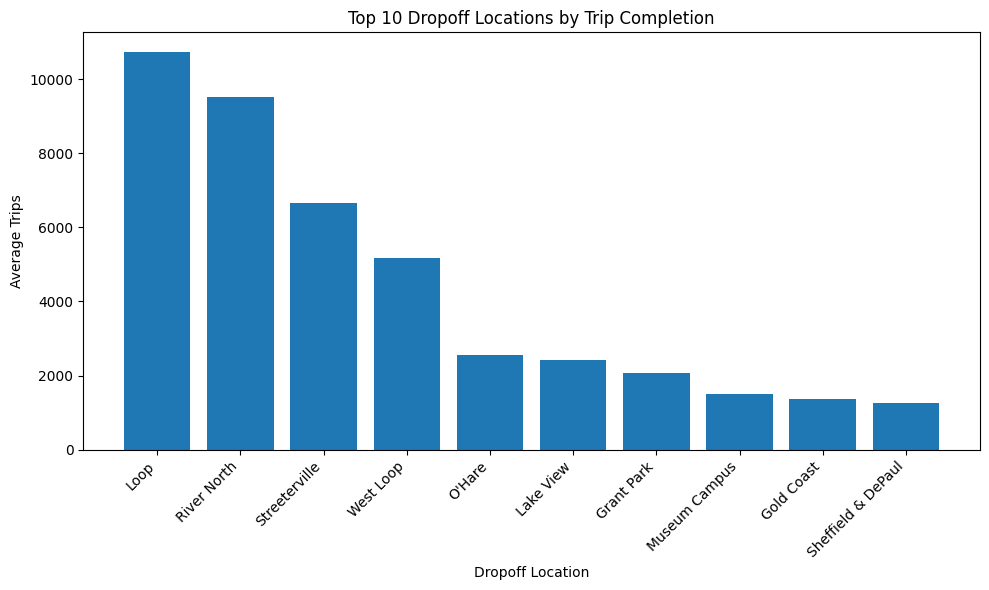

In [ ]:
#Gráfica top 10 barrios
plt.figure(figsize=(10, 6))
plt.bar(top_10_dropoffs['dropoff_location_name'], top_10_dropoffs['average_trips'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Dropoff Location")
plt.ylabel("Average Trips")
plt.title("Top 10 Dropoff Locations by Trip Completion")
plt.tight_layout()
plt.show()

- El gráfico muestra los 10 barrios con mayor cantidad promedio de viajes finalizados. Se observa que ciertos vecindarios tienen una demanda mucho mayor como destino de taxis.
- Con más de 10000 viajes promedio, Loop es el barrio con más finalizaciones. Esto es coherente, ya que Loop es el centro financiero y comercial de Chicago. Indica una fuerte concentración de actividad laboral y turística.
- River North con ~9500 viajes promedio y Streeterville con ~6600 viajes promedio evidencian ser zonas también de gran actividad. Ambas son zonas con alta densidad de restaurantes, vida nocturna, hoteles y atracciones turísticas. La actividad económica explica su alta demanda.
- West Loop y O’Hare destacan por razones distintas. West Loop presenta un crecimiento reciente, de restaurantes y oficinas modernas mientras que eb O’Hare esta uno de los aeropuertos más grandes del mundo.
- Los demás barrios tienen demanda estable pero menor registrando entre 1500 y 2500 viajes, mostrando un nivel moderado de actividad. Estos lugares son turísticos o residenciales de clase media/alta.

# Prueba de hipótesis

/datasets/project_sql_result_07.csv — contiene el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

Primeramente se realizará una prueba de Levene para comprobar si las varianzas de dos grupos (viajes en sábado lluvioso vs. viajes en sábado no lluvioso) son iguales antes de realizar la prueba t. Ya que la prueba t estándar solo es válida si las varianzas son iguales, y Levene te dice si puedes hacer esa suposición.

Se dividirá el conjunto de datos en dos grupos:
Bad: viajes en sábados lluviosos.
Good: viajes en sábados no lluviosos.

In [ ]:
#carga del data frame
df = pd.read_csv('/datasets/project_sql_result_07.csv')

# Convertir timestamps
df['start_ts'] = pd.to_datetime(df['start_ts'])

# Filtrar solo sábados
df['weekday'] = df['start_ts'].dt.day_name()
saturday = df[df['weekday'] == 'Saturday']

# Dividir sábados lluviosos vs no lluviosos
good = saturday[saturday['weather_conditions'] == 'Good'].dropna(subset=['duration_seconds'])
bad = saturday[saturday['weather_conditions'] == 'Bad'].dropna(subset=['duration_seconds'])

In [ ]:
#Aplicando la prueba de Levene (compara varianzas)
stat_lev, p_lev = levene(good['duration_seconds'], bad['duration_seconds'])
print("\nTest de Levene:")
print("Statistic:", stat_lev)
print("p-value:", p_lev)



Test de Levene:
Statistic: 0.38853489683656073
p-value: 0.5332038671974493


In [ ]:
#Nivel de significancia
alpha = 0.05

#T-test dependiendo del resultado de Levene
if p_lev > alpha:
    print("\nVarianzas iguales → t-test estándar")
    stat_t, p_t = ttest_ind(good['duration_seconds'], bad['duration_seconds'], equal_var=True)
else:
    print("\nVarianzas diferentes → Welch t-test")
    stat_t, p_t = ttest_ind(good['duration_seconds'], bad['duration_seconds'], equal_var=False)



Varianzas iguales → t-test estándar


### Planteamiento de las hipótesis
- Hipótesis nula (H₀): La lluvia no cambia la duración promedio de los viajes los sábados.

- Hipótesis alternativa (H₁): La lluvia sí cambia la duración de los viajes los sábados.

Nota:
El planteamiento de hipótesis en estadística se basa en definir dos afirmaciones contrapuestas.
La hipótesis nula (H₀) es la afirmación que asume que no existe efecto, diferencia o cambio en la población que se está analizando. Representa la condición “sin impacto”, y se mantiene como válida hasta que los datos ofrezcan suficiente evidencia para rechazarla.
La hipótesis alternativa (H₁) es la afirmación que propone que sí existe un efecto, diferencia o cambio en la variable que se está estudiando. Es la hipótesis que se busca demostrar mediante la evidencia estadística.

In [ ]:
#Aplicación de la prueba t-test estándar
print("Resultados T-test:")
print("Statistic:", stat_t)
print("p-value:", p_t)

print()
if p_t < alpha:
    print("Rechazamos H0: la duración promedio de los viajes sí cambia entre sábados con clima Good y Bad.")
else:
    print("No podemos rechazar H0: no se observa una diferencia significativa en la duración promedio de los viajes.")

Resultados T-test:
Statistic: -6.946177714041499
p-value: 6.517970327099473e-12

Rechazamos H0: la duración promedio de los viajes sí cambia entre sábados con clima Good y Bad.


Conclusiones
- Dado que el valor p obtenido en la prueba (p ≈ 6.5e-12) es menor que el nivel de significancia establecido (α), se rechaza la hipótesis nula.

- Esto significa que existe evidencia estadísticamente significativa para concluir que:
La duración promedio de los viajes desde el Loop hacia el Aeropuerto O’Hare sí cambia entre los sábados lluviosos y no lluviosos.